<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

Описание данных
<br>
<br>
Технологический процесс<br>
Rougher feed — исходное сырье<br>
Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant <br>
Xanthate — ксантогенат (промотер, или активатор флотации);<br>
Sulphate — сульфат (на данном производстве сульфид натрия);<br>
Depressant — депрессант (силикат натрия).<br>
Rougher process (англ. «грубый процесс») — флотация<br>
Rougher tails — отвальные хвосты<br>
Float banks — флотационная установка<br>
Cleaner process — очистка<br>
Rougher Au — черновой концентрат золота<br>
Final Au — финальный концентрат золота<br>
<br>
Параметры этапов<br>
air amount — объём воздуха<br>
fluid levels — уровень жидкости<br>
feed size — размер гранул сырья<br>
feed rate — скорость подачи<br>
<br>

## Подготовка данных

Импортируем все необходимые для работы библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.pipeline import  make_pipeline

from sklearn.impute import KNNImputer
from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings('ignore')

Загрузим выборки

In [2]:
data_train = pd.read_csv('/datasets/gold_industry_train.csv')
data_test = pd.read_csv('/datasets/gold_industry_test.csv')
data_full = pd.read_csv('/datasets/gold_industry_full.csv')

Посмотрим информацию по выборкам

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [5]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


По первому взгляду на данные можно сказать, что, например, в тестовой выборке намного меньше признаков, чем в полной и тренировочной базах.

Изменим формат столбца date на тип данных datetime

In [6]:
data_train.loc[:,'date'] = pd.to_datetime(data_train['date'], format="%Y-%m-%d %H:%M:%S")
data_test.loc[:,'date'] = pd.to_datetime(data_test['date'], format="%Y-%m-%d %H:%M:%S")
data_full.loc[:,'date'] = pd.to_datetime(data_full['date'], format="%Y-%m-%d %H:%M:%S")

In [7]:
data_train.index = data_train.loc[:,'date']
data_train = data_train.drop(columns='date')

data_test.index = data_test.loc[:,'date']
data_test = data_test.drop(columns='date')

data_full.index = data_full.loc[:,'date']
data_full = data_full.drop(columns='date')

Проверим датасеты на наличие дубликатов

In [8]:
data_train.duplicated().sum()

0

In [9]:
data_test.duplicated().sum()

0

In [10]:
data_full.duplicated().sum()

0

Посмотрим числовые описания данных в наших выборках

In [11]:
data_train.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579.000000,14578.000000,14504.000000,14574.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,7.111347,43.979499,5.192145,9.923809,9.566676,66.759066,3.087939,9.731972,2.719985,10.612745
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,3.909951,5.471437,1.388014,1.706976,2.805654,10.619709,0.915187,2.358143,0.958929,2.871075
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,3.784897,43.345906,4.283347,9.103183,7.860030,63.114596,2.505287,8.088928,2.036512,9.013412
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,7.629968,44.975014,5.118647,10.046455,9.301970,67.962788,3.029238,9.818512,2.774847,10.670515
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,10.367050,46.275153,5.925380,10.981203,11.001573,72.598187,3.614098,11.169187,3.353845,12.130827
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,26.000772,52.756638,16.001945,16.705297,19.423912,100.000000,8.245022,19.552149,5.804178,22.317730


In [12]:
data_test.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,...,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,...,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,...,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,...,1.079872e-16,-799.704969,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800
25%,6.574363,6.975898,2.903612,34.510841,434.099695,47.596984,9.890429,5.499808,999.715729,-499.731972,...,1.501123e+01,-500.704004,1.202172e+01,-500.196517,11.073822,-500.483564,9.011890,-500.129913,14.963953,-500.668501
50%,7.812923,8.179714,3.540772,37.499761,502.118742,55.509481,11.997859,6.099805,1001.414798,-300.181367,...,1.996807e+01,-499.892919,1.501240e+01,-499.540776,16.631195,-499.873136,11.999417,-499.955304,19.960006,-500.033769
75%,9.556589,10.084339,4.199847,40.461315,555.596563,66.661547,14.496072,6.802101,1202.837565,-299.961547,...,2.498900e+01,-498.652030,1.999949e+01,-400.302329,19.983191,-498.852815,15.004198,-499.643776,24.974583,-499.460134
max,13.417156,14.533698,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,...,3.008450e+01,-383.373053,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459


In [13]:
data_full.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,...,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000
mean,8.266097,8.794927,3.598085,36.695114,478.320042,58.970310,12.334373,6.021474,1105.315068,-376.610690,...,7.167247,44.076513,5.168470,9.978895,9.501224,67.050208,3.042467,9.688589,2.705795,10.583728
std,1.955092,1.936847,1.049486,5.145445,105.373758,21.634478,3.427317,1.127263,160.826798,93.909667,...,3.916079,5.129784,1.372348,1.669240,2.787537,10.125840,0.922808,2.328642,0.949077,2.868782
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.046369,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.854384,7.237967,2.887280,34.207799,416.525453,47.435103,10.000362,5.398678,999.661867,-499.835165,...,3.845475,43.402215,4.251240,9.137262,7.722820,63.299712,2.461138,8.062878,2.040119,8.938947
50%,8.125839,8.593574,3.534895,37.202650,499.416120,54.610197,12.001174,6.008273,1001.072890,-300.263994,...,7.685827,45.011244,5.066094,10.102433,9.218961,68.172738,2.984909,9.743623,2.748730,10.622456
75%,9.769917,10.213771,4.244161,40.039133,550.172183,65.023044,14.716595,6.798051,1205.620588,-299.981998,...,10.411296,46.275313,5.895527,11.035769,10.947813,72.686642,3.571351,11.134294,3.333216,12.104271
max,13.731330,14.596026,7.142594,53.477742,717.508837,484.967466,36.118275,9.703448,1521.980372,-273.776101,...,26.000772,52.756638,16.001945,17.031899,19.615720,100.000000,8.245022,19.552149,5.804178,22.317730


Посмотрим пропуски данных

In [14]:
data_train.isna().sum()
data_test.isna().sum()
data_full.isna().sum()

rougher.input.feed_au        0
rougher.input.feed_ag        0
rougher.input.feed_pb      100
rougher.input.feed_sol      99
rougher.input.feed_rate     11
                          ... 
final.output.recovery        0
final.output.tail_au         0
final.output.tail_ag         1
final.output.tail_pb       101
final.output.tail_sol        6
Length: 86, dtype: int64

Посчитаем эффективность обогащения (rougher.output.recovery), проверим её корректность <br>
Формуля для расчёта recovery = C*(F-T)/F*(C-T)*100
<br>
где <br>
C — доля золота в концентрате после флотации/очистки ('rougher.output.concentrate_au'); <br>
F — доля золота в сырье/концентрате до флотации/очистки ('rougher.input.feed_au'); <br>
T — доля золота в отвальных хвостах после флотации/очистки ('rougher.output.tail_au').<br> 

In [15]:
# напишем функцию для расчёта
def recovery(row):
    C = row['rougher.output.concentrate_au']
    F = row['rougher.input.feed_au']
    T = row['rougher.output.tail_au']
    return C*(F-T)/(F*(C-T))*100

In [16]:
# добавляем новый столбец
data_train['rougher.output.new_recovery'] = data_train.apply(recovery, axis=1)

Рассчитаем метрику MAE, чтобы посмотреть на разницу между расчетными и исходными данными по обогащению.

In [17]:
mae(data_train['rougher.output.recovery'], data_train['rougher.output.new_recovery'])

9.83758577644259e-15

Вывод: вычисленное значение MAE имеет малое отклонение, значит параметр recovery в обучающей выборке посчитан верно.

Теперь можем удалить новый столбец

In [18]:
 data_train = data_train.drop('rougher.output.new_recovery', axis=1)

Сравним признаки тестового и исходный датасетов

In [19]:
for col in data_full.columns:
    if not data_test.columns.isin([col]).any():
        print(col)

rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_au
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.recovery
rougher.output.tail_au
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
secondary_cleaner.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.output.tail_sol
final.output.concentrate_au
final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.recovery
final.output.tail_au
final.output.ta

**Вывод**
<br>
Количество признаков в тестовой выборке намного меньше, чем в двух других (53 против 87), вероятно признаки, которые отсутствую,  характерны для выходых данных промежуточных этапов технологического процесса извлечения золота из руды, которые заранее неизвестны. 
Необходимо будет добавить целевые признаки (rougher.output.recovery, final.output.recovery) в тестовую выборку.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Верно!</font>

Добавим целевые признаки в тестовую выборку

In [20]:
data_test.loc[:,'rougher.output.recovery'] = data_full.loc[:,'rougher.output.recovery']
data_test.loc[:,'final.output.recovery'] = data_full.loc[:,'final.output.recovery']

Обработаем аномалии в датасетах

Заполним пропуски данных

In [21]:
data_train.fillna(method='ffill', inplace=True)
data_test.fillna(method='ffill', inplace=True)
data_full.fillna(method='ffill', inplace=True)

In [22]:
# проверим
pd.DataFrame({'data_train': data_train.isna().values.sum(),
              'data_test': data_test.isna().values.sum(),
              'data_full': data_full.isna().values.sum()}, index=['count NaN values'])

,data_train,data_test,data_full
count NaN values,0,0,0


**Вывод по этапу обработки данных**
<br>
<br>
Признаков в полной и обучающей выборках - 87, в тестовой меньше - 53 (связано это с особенностью этапов технологического процесса, когда не все данные возможно внести сразу).
<br>
Провели расчет эффективности обогащения, он совпал с исходным.
<br>
Почти все признаки имеют тип float64 кроме столбца date, который был с типом object. Изменили тип данных этого столбца на datetime.
Пропуски в данных обработали методом ffil. Дубликатов не обнаружен.  
<br>

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. 

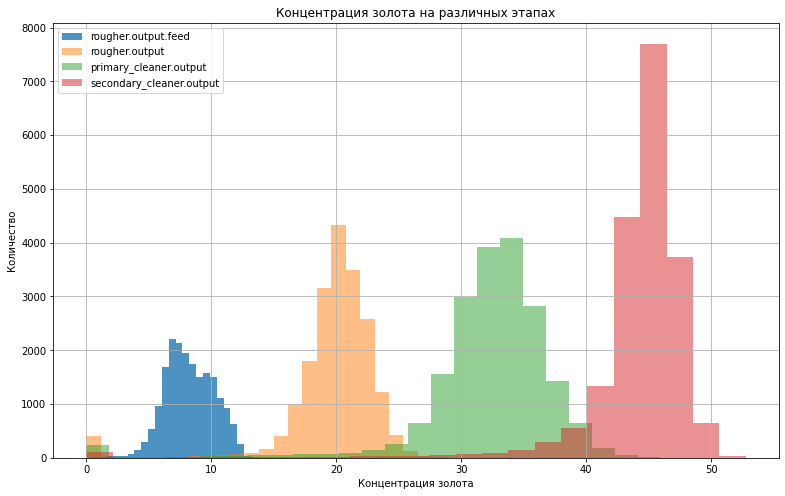

In [23]:
# концентрация золота
plt.figure(figsize=(13,8))
data_full['rougher.input.feed_au'].hist(bins=25, label='rougher.output.feed', alpha=0.8)
data_full['rougher.output.concentrate_au'].hist(bins=25, label='rougher.output', alpha=0.5)
data_full['primary_cleaner.output.concentrate_au'].hist(bins=25, label='primary_cleaner.output', alpha=0.5)
data_full['final.output.concentrate_au'].hist(bins=25, label='secondary_cleaner.output', alpha=0.5)
plt.title('Концентрация золота на различных этапах')
plt.xlabel('Концентрация золота')
plt.ylabel('Количество')
plt.legend(loc='upper left')
plt.show()

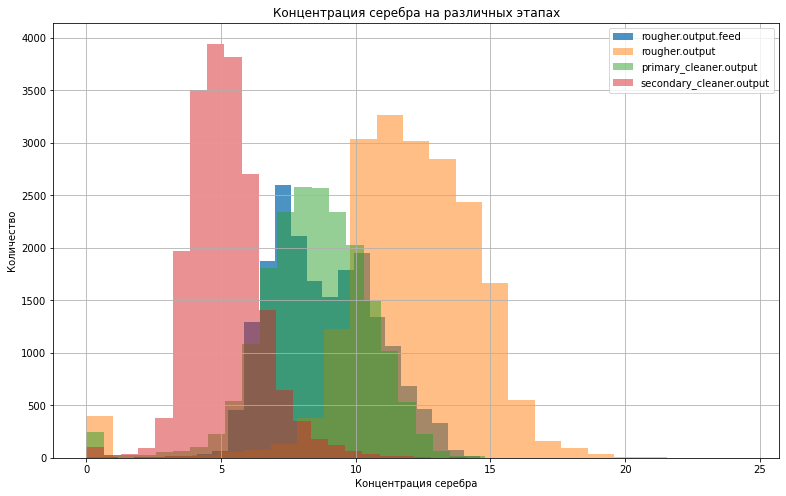

In [24]:
# концентрация серебра
plt.figure(figsize=(13,8))

data_full['rougher.input.feed_ag'].hist(bins=25, label='rougher.output.feed', alpha=0.8)
data_full['rougher.output.concentrate_ag'].hist(bins=25, label='rougher.output', alpha=0.5)
data_full['primary_cleaner.output.concentrate_ag'].hist(bins=25, label='primary_cleaner.output', alpha=0.5)
data_full['final.output.concentrate_ag'].hist(bins=25, label='secondary_cleaner.output', alpha=0.5)

plt.title('Концентрация серебра на различных этапах')
plt.legend(loc='upper right')
plt.xlabel('Концентрация серебра')
plt.ylabel('Количество')
plt.show()

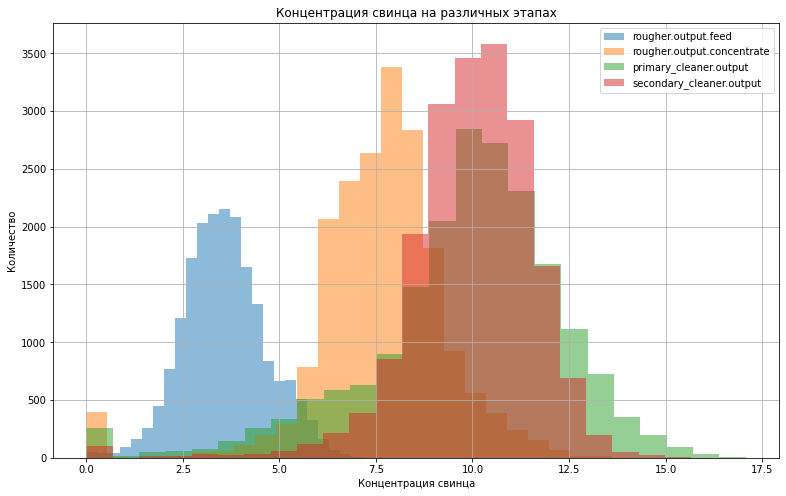

In [25]:
# концентрация свинца

plt.figure(figsize=(13,8))

data_full['rougher.input.feed_pb'].hist(bins=25, label='rougher.output.feed', alpha=0.5)
data_full['rougher.output.concentrate_pb'].hist(bins=25, label='rougher.output.concentrate', alpha=0.5)
data_full['primary_cleaner.output.concentrate_pb'].hist(bins=25, label='primary_cleaner.output', alpha=0.5)
data_full['final.output.concentrate_pb'].hist(bins=25, label='secondary_cleaner.output', alpha=0.5)
plt.title('Концентрация свинца на различных этапах')
plt.legend(loc='upper right')
plt.xlabel('Концентрация свинца')
plt.ylabel('Количество')
plt.show()

Концентрация золота на каждом этапе увеличивается. 
<br>
У серебра наблюдается увеличение концентрации после первого этапа на втором, далее значения третьего этапа опускаются до значений первого. Далее резкое повышение на последнем этапе. 
<br>
Концентрация свинца увеличивается после первого этапа очистки, на вторичной и первчиной очистке немного уменьшается. 
<br>
На гистрограмах видны значения равные нулю, вероятно это выбросы.

Сравним распределения размеров гранул исходного сырья на обучающей и тестовой выборках. 

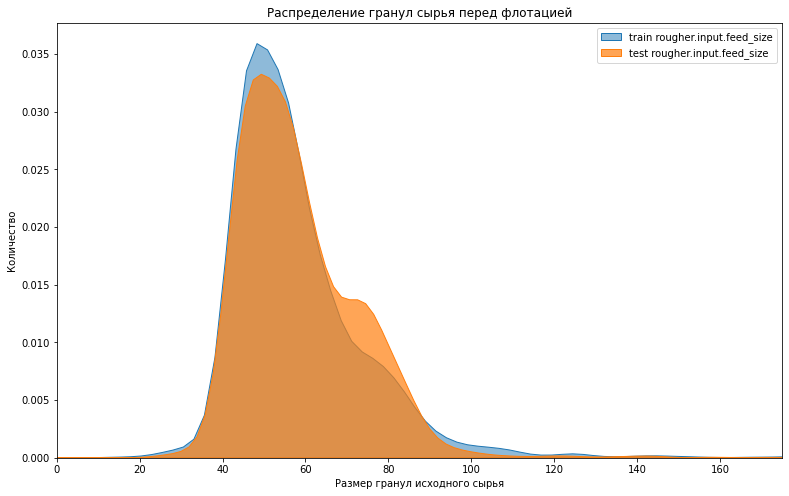

count    14579.000000
mean        59.070865
std         22.903811
min          0.049194
25%         47.322462
50%         54.464259
75%         64.469177
max        484.967466
Name: rougher.input.feed_size, dtype: float64
count    4860.000000
mean       59.136150
std        19.512497
min         0.046369
25%        47.610795
50%        55.461058
75%        66.538910
max       363.989699
Name: rougher.input.feed_size, dtype: float64


In [26]:
# концентрация сырья на флотации в выборках train и test

plt.figure(figsize=(13, 8))
sns.kdeplot(data_train['rougher.input.feed_size'], label='train rougher.input.feed_size', alpha=0.5, shade=True)
sns.kdeplot(data_test['rougher.input.feed_size'], label='test rougher.input.feed_size', alpha=0.7, shade=True)
plt.xlim([0, 175])
plt.xlabel('Размер гранул исходного сырья')
plt.ylabel('Количество')
plt.title('Распределение гранул сырья перед флотацией')
plt.legend(loc='upper right')
plt.show()
print(data_train['rougher.input.feed_size'].describe())
print(data_test['rougher.input.feed_size'].describe())

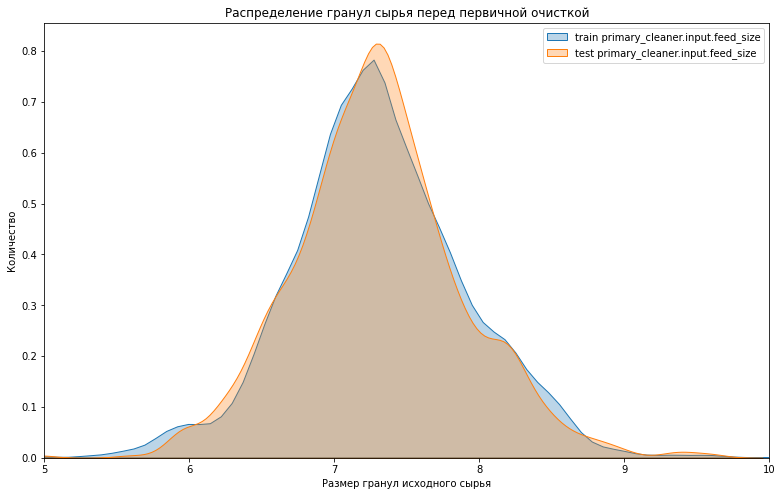

count    14579.000000
mean         7.307600
std          0.621609
min          1.080000
25%          6.940000
50%          7.280000
75%          7.689666
max         15.500000
Name: primary_cleaner.input.feed_size, dtype: float64
count    4860.000000
mean        7.305514
std         0.588602
min         4.970000
25%         6.940000
50%         7.290000
75%         7.630000
max         9.630000
Name: primary_cleaner.input.feed_size, dtype: float64


In [27]:
# концентрация сырья на этапе финальной очистки train и test

plt.figure(figsize=(13, 8))
sns.kdeplot(data_train['primary_cleaner.input.feed_size'], 
         label='train primary_cleaner.input.feed_size', alpha=0.3, shade=True)
sns.kdeplot(data_test['primary_cleaner.input.feed_size'],  
         label='test primary_cleaner.input.feed_size', alpha=0.3, shade=True)
plt.xlim([5, 10])
plt.xlabel('Размер гранул исходного сырья')
plt.ylabel('Количество')
plt.title('Распределение гранул сырья перед первичной очисткой')
plt.legend(loc='upper right')
plt.show()
print(data_train['primary_cleaner.input.feed_size'].describe())
print(data_test['primary_cleaner.input.feed_size'].describe())

Диаграмы распределения оказались похожи, что может свидетельствовать об однородности данных размеров сырья в выборках обучающей и тестовой выборках. Наблюдаются выбросы.

Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

In [28]:
rougher_input_concentrate_train_sum = (data_train['rougher.input.feed_au'] + 
                                        data_train['rougher.input.feed_ag'] + 
                                        data_train['rougher.input.feed_pb'])

rougher_output_concentrate_train_sum = (data_train['rougher.output.concentrate_au'] + 
                                        data_train['rougher.output.concentrate_ag'] + 
                                        data_train['rougher.output.concentrate_pb'])

primary_cleaner_output_concentrate_train_sum = (data_train['primary_cleaner.output.concentrate_au'] + 
                                                data_train['primary_cleaner.output.concentrate_ag'] + 
                                                data_train['primary_cleaner.output.concentrate_pb'])

final_output_concentrate_train_sum = (data_train['final.output.concentrate_au'] + 
                                      data_train['final.output.concentrate_ag'] + 
                                      data_train['final.output.concentrate_pb'])

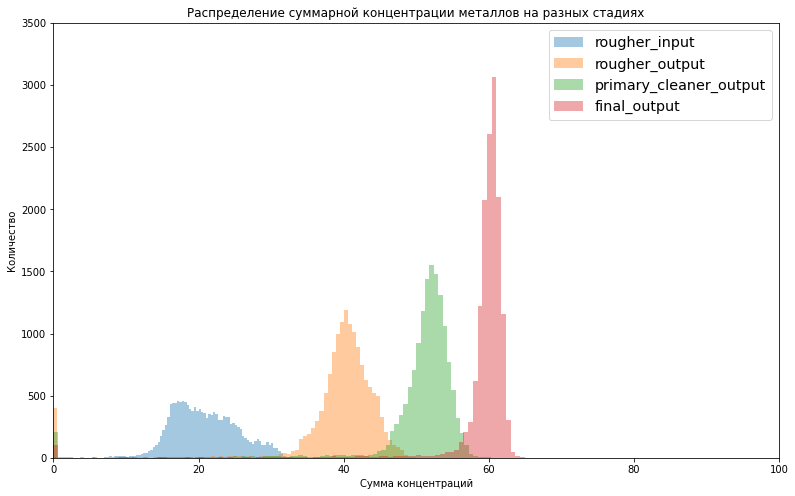

In [29]:
# строим гистограмму
plt.figure(figsize=[13,8])

plt.hist(rougher_input_concentrate_train_sum, bins=100, label = 'rougher_input', alpha=.4)
plt.hist(rougher_output_concentrate_train_sum, bins=100, label = 'rougher_output', alpha=.4)
plt.hist(primary_cleaner_output_concentrate_train_sum, bins=100, label = 'primary_cleaner_output', alpha=.4)
plt.hist(final_output_concentrate_train_sum, bins=100, label = 'final_output', alpha=.4)

plt.xlim([0, 100])
plt.ylim([0, 3500])

plt.xlabel("Сумма концентраций")
plt.ylabel("Количество")

plt.legend(loc='upper right', fontsize='x-large')

plt.title("Распределение суммарной концентрации металлов на разных стадиях")
plt.show()

Наблюдаем на графике аномальные нулевые значения.

Проверим их количество

На этапе сырья

In [30]:
data_train[data_train['rougher.input.feed_au'] < 1]['rougher.input.feed_au'].count()

17

In [31]:
data_train[data_train['rougher.input.feed_ag'] < 1]['rougher.input.feed_ag'].count()

4

In [32]:
data_train[data_train['rougher.input.feed_ag'] < 1]['rougher.input.feed_ag'].count()

4

На этапе чернового концентрата

In [33]:
data_train[data_train['rougher.output.concentrate_au'] < 1]['rougher.output.concentrate_au'].count()

398

In [34]:
data_train[data_train['rougher.output.concentrate_ag'] < 1]['rougher.output.concentrate_ag'].count()

399

In [35]:
data_train[data_train['rougher.output.concentrate_pb'] < 1]['rougher.output.concentrate_pb'].count()

401

На этапе концентрата после первой очистки

In [36]:
data_train[data_train['primary_cleaner.output.concentrate_au'] < 1]['primary_cleaner.output.concentrate_au'].count()

214

In [37]:
data_train[data_train['primary_cleaner.output.concentrate_ag'] < 1]['primary_cleaner.output.concentrate_ag'].count()

239

In [38]:
data_train[data_train['primary_cleaner.output.concentrate_pb'] < 1]['primary_cleaner.output.concentrate_pb'].count()

242

На этапе финального концентрата

In [39]:
data_train[data_train['final.output.concentrate_au'] < 1]['final.output.concentrate_au'].count()

100

In [40]:
data_train[data_train['final.output.concentrate_ag'] < 1]['final.output.concentrate_ag'].count()

117

In [41]:
data_train[data_train['final.output.concentrate_pb'] < 1]['final.output.concentrate_pb'].count()

103

Значений этих не очень много, поэтому удалим эти выбросы

In [42]:
data_train = data_train.drop(data_train[data_train['rougher.input.feed_au'] == 0].index)
data_train[data_train['rougher.input.feed_au'] == 0].head()

data_train = data_train.drop(data_train[data_train['rougher.input.feed_ag'] == 0].index)
data_train[data_train['rougher.input.feed_ag'] == 0].head()

data_train = data_train.drop(data_train[data_train['rougher.input.feed_pb'] == 0].index)
data_train[data_train['rougher.input.feed_pb'] == 0].head()

data_train = data_train.drop(data_train[data_train['rougher.output.concentrate_au'] == 0].index)
data_train[data_train['rougher.output.concentrate_au'] == 0].head()

data_train = data_train.drop(data_train[data_train['rougher.output.concentrate_ag'] == 0].index)
data_train[data_train['rougher.output.concentrate_ag'] == 0].head()

data_train = data_train.drop(data_train[data_train['rougher.output.concentrate_pb'] == 0].index)
data_train[data_train['rougher.output.concentrate_pb'] == 0].head()

data_train = data_train.drop(data_train[data_train['primary_cleaner.output.concentrate_au'] == 0].index)
data_train[data_train['primary_cleaner.output.concentrate_au'] == 0].head()

data_train = data_train.drop(data_train[data_train['primary_cleaner.output.concentrate_ag'] == 0].index)
data_train[data_train['primary_cleaner.output.concentrate_ag'] == 0].head()

data_train = data_train.drop(data_train[data_train['primary_cleaner.output.concentrate_pb'] == 0].index)
data_train[data_train['primary_cleaner.output.concentrate_pb'] == 0].head()

data_train = data_train.drop(data_train[data_train['final.output.concentrate_au'] == 0].index)
data_train[data_train['final.output.concentrate_au'] == 0].head()

data_train = data_train.drop(data_train[data_train['final.output.concentrate_ag'] == 0].index)
data_train[data_train['final.output.concentrate_ag'] == 0].head()

data_train = data_train.drop(data_train[data_train['final.output.concentrate_pb'] == 0].index)
data_train[data_train['final.output.concentrate_pb'] == 0].head()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
date,,,,,,,,,,,,,,,,,,,,,


Посмотрим на график теперь

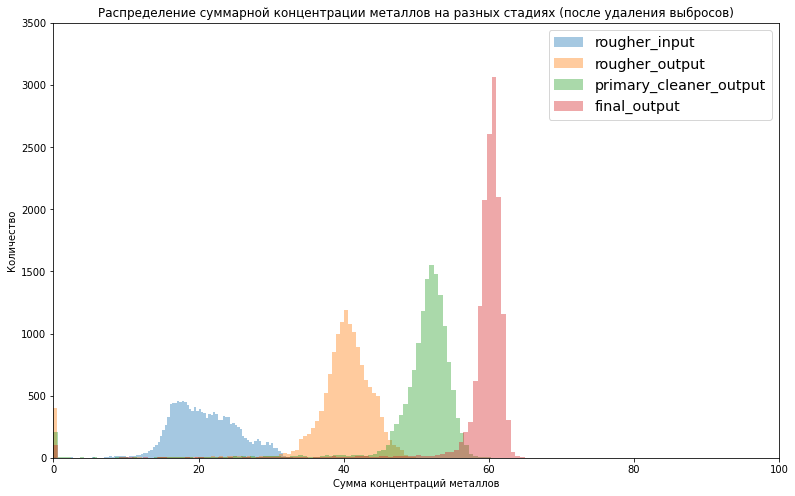

In [64]:
plt.figure(figsize=[13,8])

plt.hist(rougher_input_concentrate_train_sum, bins=100, label = 'rougher_input', alpha=.4)
plt.hist(rougher_output_concentrate_train_sum, bins=100, label = 'rougher_output', alpha=.4)
plt.hist(primary_cleaner_output_concentrate_train_sum, bins=100, label = 'primary_cleaner_output', alpha=.4)
plt.hist(final_output_concentrate_train_sum, bins=100, label = 'final_output', alpha=.4)

plt.xlim([0, 100])
plt.ylim([0, 3500])

plt.xlabel("Сумма концентраций металлов")
plt.ylabel("Количество")

plt.legend(loc='upper right', fontsize='x-large')

plt.title("Распределение суммарной концентрации металлов на разных стадиях (после удаления выбросов)")
plt.show()

**Вывод по этапу анализа данных**
- изучили и проанализировали концентрация металлов (Au, Ag, Pb) на разных этапах очистки;
- изучили и проанализировали размер гранул сырья на обучающей и тестовой выборках;
- посчитали суммарную концентрация металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате;
- вычислили и обработали аномалии. 

## Модель

Напишим функцию для вычисления итоговой sMAPE.

Необходимо спрогнозировать две величины:
- эффективность обогащения чернового концентрата rougher.output.recovery;
- эффективность обогащения финального концентрата final.output.recovery.

In [45]:
def smape(target, prediction):
    abs_diff_rougher = [abs(target['rougher.output.recovery'][i] - prediction[i][0]) for i in range(len(prediction))]
    abs_diff_final = [abs(target['final.output.recovery'][i] - prediction[i][1]) for i in range(len(prediction))]
    
    denominator_rougher = [(abs(target['rougher.output.recovery'][i]) + abs(prediction[i][0])) / 2 for i in range(len(prediction))]
    denominator_final = [(abs(target['final.output.recovery'][i]) + abs(prediction[i][1])) / 2 for i in range(len(prediction))]

    smape_rougher = sum(abs_diff_rougher) / sum(denominator_rougher) * 100
    smape_final = sum(abs_diff_final) / sum(denominator_final) * 100
    
    smape_combined = 0.25 * smape_rougher + 0.75 * smape_final
    
    return smape_combined

In [46]:
columns = list(set(data_train.columns) - set(data_test.columns))

In [47]:
data_train.drop(columns, axis=1, inplace = True)

In [48]:
target_train = data_train[['rougher.output.recovery', 'final.output.recovery']]
features_train = data_train.drop(['rougher.output.recovery', 'final.output.recovery'],axis = 1)

target_test = data_test[['rougher.output.recovery', 'final.output.recovery']]
features_test = data_test.drop(['rougher.output.recovery', 'final.output.recovery'],axis = 1)

In [49]:
score = make_scorer(smape)

Обучим разные модели и оценим их качество кросс-валидацией. 

**Линейная регрессия**

In [50]:
model_LR = LinearRegression()
model_LR.fit(features_train, target_train)

LinearRegression()

In [51]:
score_LR = cross_val_score(model_LR, features_train, target_train, cv=5, scoring=score)
score_LR.mean()

8.507849981455417

In [52]:
# найдём лучшие параметры max_depth и min_samples_leaf для модели дерева решений
# %%time
best = 1000
d = 0
s = 0
for depth in range(4,20,2):
    for samples in range(2, 11,2):
        model_DTR = DecisionTreeRegressor(max_depth = depth,min_samples_leaf = samples, random_state = 42)
        score_DTR = cross_val_score(model_DTR, features_train, target_train, cv=5, scoring = score).mean()
        if score_DTR < best:
            best = score_DTR
            d = depth
            s = samples
print('Лучшее значение smape для модели дерева решений:', best, 'с глубиной (depth) =', d, 'и количеством наблюдений (samples) = ', s)

Лучшее значение smape для модели дерева решений: 8.795396927122656 с глубиной (depth) = 4 и количеством наблюдений (samples) =  2


In [53]:
# найдём лучшие параметры max_depth и n_estimators для модели случайного леса

# %%time
best = 1000
d = 0
e = 0
for depth in range(1,16,2):
    for estim in range(1,30,2):
        model_RFR = RandomForestRegressor(max_depth = depth, n_estimators = estim, random_state = 42)
        score_RFR = cross_val_score(model_RFR, features_train, target_train, cv=5, scoring = score).mean()
        if score_RFR < best:
            best = score_RFR
            d = depth
            e = estim
print('Лучшее значение smape для модели случайного леса:', best, 'с глубиной (depth) =', d, 'и количеством деревьев (estimators) = ', e)

Лучшее значение smape для модели случайного леса: 8.150955125451166 с глубиной (depth) = 3 и количеством деревьев (estimators) =  27


Выберем лучшую модель.
В нашем случае это получилась модель случайного леса с параметрами:
- глубина 3, количество деревьев 27.

In [ ]:
# создаем модель случайного леса с заданными параметрами
model_RFR = RandomForestRegressor(max_depth=3, n_estimators=27, random_state=42)
scores_RFR = cross_val_score(model_RFR, features_train, target_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# выбираем и обучаем лучшую модель на основе кросс-валидации
best_model_RFR = model_RFR
best_model_RFR.fit(features_train, target_train)

prediction_RFR = best_model_RFR.predict(features_test)

# вычисляем SMAPE между истинными и предсказанными значениями
smape_RFR = smape(target_test, prediction_RFR)
smape_RFR


In [66]:
# создание модели решающего дерева с заданными параметрами
model_DTR = DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, random_state=42)

# кросс-валидация и выбор лучшей модели 
scores_DTR = cross_val_score(model_DTR, features_train, target_train, cv=5, scoring='neg_mean_absolute_percentage_error')
best_model_DTR = model_DTR

# обучаем модель на полном наборе обучающих данных
best_model_DTR.fit(features_train, target_train)

# предсказание целевой переменной с использованием лучшей модели
prediction_DTR = best_model_DTR.predict(features_test)
# вычисление SMAPE 
smape_DTR = smape(target_test, prediction_DTR)
smape_DTR

6.982128044422887

Проверим лучшую модель на тестовой выборке. 

In [58]:
def model_RFR_test(features_train, target_train, features_test, depth, estimators):
   
    model_RFR_test = RandomForestRegressor(random_state=12345, max_depth = 3, n_estimators=27)
    model_RFR_test.fit(features_train, target_train)
    predict_model_RFR_test = model_RFR_test.predict(features_test)

    return predict_model_RFR_test

In [59]:
predict_test = model_RFR_test(features_train, target_train, features_test, 5, 150)

In [60]:
smape_test = smape(target_test, predict_test)

In [61]:
print('smape на тестовых данных =', round(smape_test, 3))

smape на тестовых данных = 7.2


Проверим модель на адекватность

In [62]:
# проверяем на адекватность

model_constant = target_test[['rougher.output.recovery','final.output.recovery']]
model_constant['rougher.output.recovery'] = target_train['rougher.output.recovery'].mean()
model_constant['final.output.recovery'] = target_train['final.output.recovery'].mean()
smape(target_test,model_constant.to_numpy())


8.261050723121862

In [63]:
print('Итоговое значение smape константной модели на тестовой выборке равна', round(smape(target_test,model_constant.to_numpy())))

Итоговое значение smape константной модели на тестовой выборке равна 8


**Вывод**
<br>
- рассчитали функцию для вычисления sMAPE;
- обучили на обучающей выборке модели линейной регрессии, дерева решений и случайного леса;
- оценили каждый модель и выбрали модель случайного леса с параметрами: глубина = 3, количество деревьев = 27; такие параметры позволили получить smape = 7.47;
- после проверки модели на адекватность, итоговая оценка smape константной модели на тестовых данных получилась 8.